In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [7]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [8]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

In [9]:
run = 595

## Cell ids

In [10]:
with sparse.Run(path_to_data + "r%04d.h5" %run) as r:
    cells = r.cellIds
cellselect = np.zeros((150,len(cells)), dtype=np.bool)
for i in range(150):
    cellselect[i,cells==i] = True

## Powder sum of background

In [12]:
read_from_file = True

In [13]:
if not read_from_file:
    powder_modules = np.empty((150,16,128,512))
    for i in range(150):
        print("Powder sum for cell %d" %i)
        with sparse.Powder(path_to_data + "r%04d.h5" %run, selection=cellselect[i]) as p:
            powder_modules[i] = p.powder()
    with h5py.File(path_to_aux + "r%04d_powder.h5" %run, 'w') as f:
        f['data'] = powder_modules

In [14]:
if read_from_file:
    with h5py.File(path_to_aux + "r%04d_powder.h5" %run, 'r') as f:
        powder_modules = f['data'][:]

In [15]:
powder_allcells = powder_modules.sum(axis=0)

In [16]:
with sparse.Frame(path_to_data + "r%04d.h5" %run, geometry=path_to_geometry+"b1.geom") as f:
    msk_active = f.activepixels
    msk_good   = f.goodpixels
    n = f.nframes

In [17]:
cid = 147

In [18]:
img = utils.assemble(powder_modules.sum(axis=0)/n, path_to_geometry+"b1.geom")
mimg = np.ma.masked_array(img, mask=1-(msk_active&msk_good))
mimg.data[mimg.data==0] = 1e-10

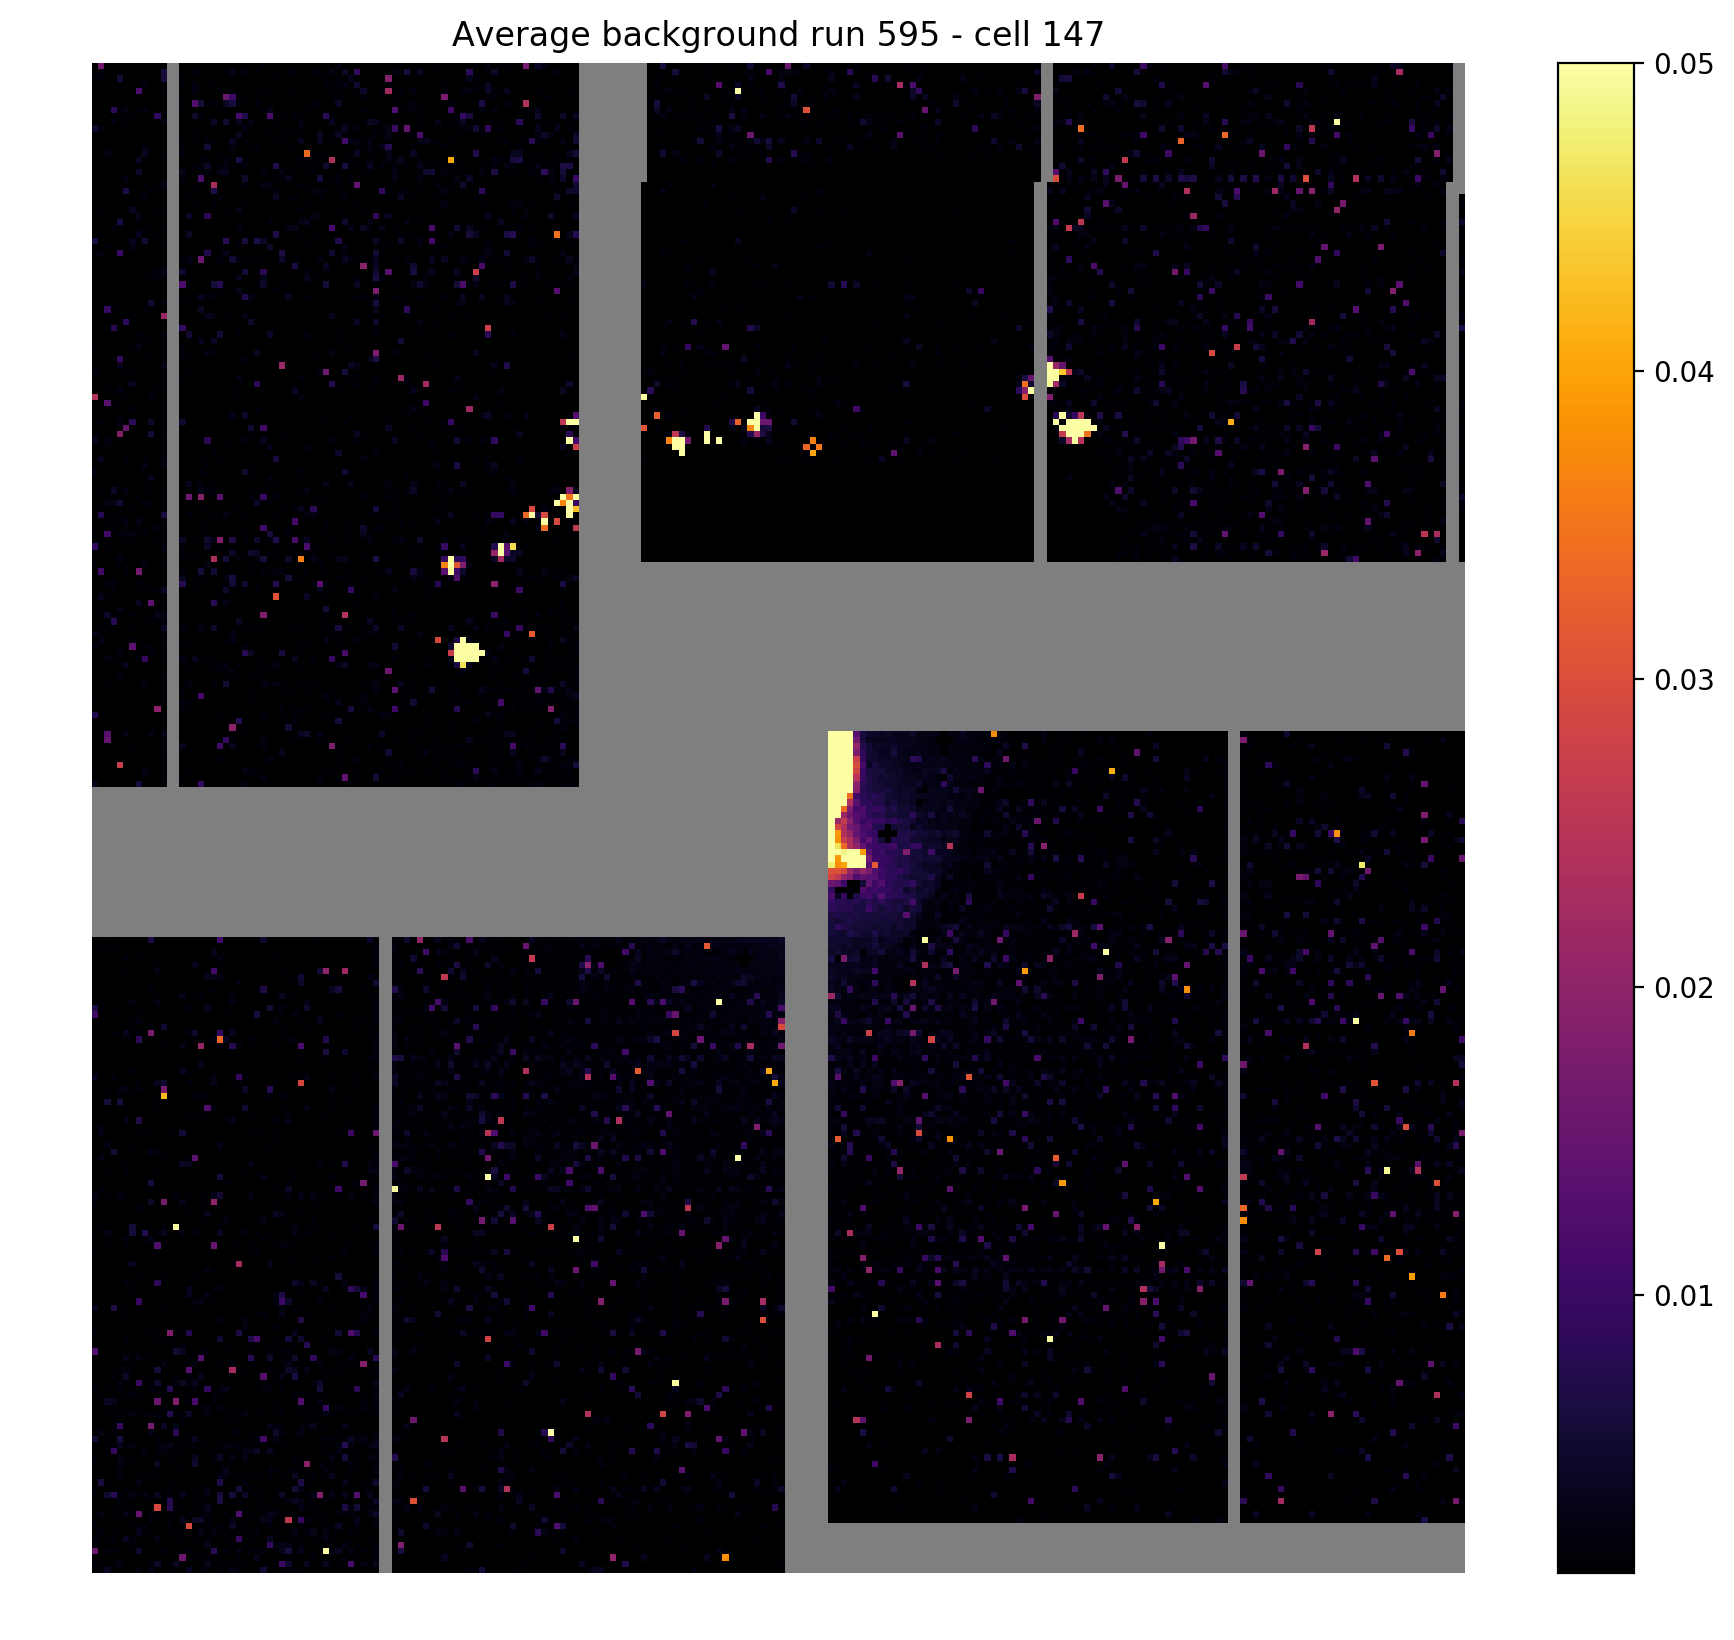

In [19]:
cx = 450
cy = 520
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.5')
cmap.set_under('0.0')
plt.figure(figsize=(12,10), dpi=200)
plt.title("Average background run %d - cell %d" %(run, cid))
plt.axis('off')
plt.imshow(mimg[cy:-cy,cx:-cx], vmin=0.001, vmax=0.05, cmap=cmap)
#plt.imshow(mimg, vmin=0.001, vmax=0.02, cmap=cmap)
plt.colorbar()
plt.savefig("../../plots/r%04d_background.png" %run, bbox_inches='tight')
plt.show()